**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [22]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *

settings_dict = {'': 'name', 'inflate': 'config.p_inflate', 'ms': 'config.ms_upper'}
ana = Analysis('inflationrate', settings_dict) #tq1newdata

Visualization for the Median Test Error (RMSE) of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

0.1 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.309524  0.295775  0.293453  0.288606
autism        0.369135  0.349251  0.341391  0.337492
biomed        0.355042  0.358654  0.367886  0.365389
credit        0.397580  0.400749  0.402917  0.404640
darwin        0.460320  0.460695  0.481309  0.461003
heart         0.422364  0.424302  0.433601  0.431520
pc4           0.306855  0.292398  0.289888  0.286801
thyroid       0.371320  0.333516  0.327211  0.329500
wilt          0.114112  0.098464  0.089609  0.084151
0.5 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.303545  0.296455  0.289036  0.292412
autism        0.350639  0.335749  0.307048  0.327743
biomed        0.356046  0.373137  0.373225  0.381613
credit        0.398982  0.401331  0.406018  0.408634
darwin        0.473838  0.470407  0.487945  0.479821
heart         0.41

IndexError: index 4 is out of bounds for axis 0 with size 4

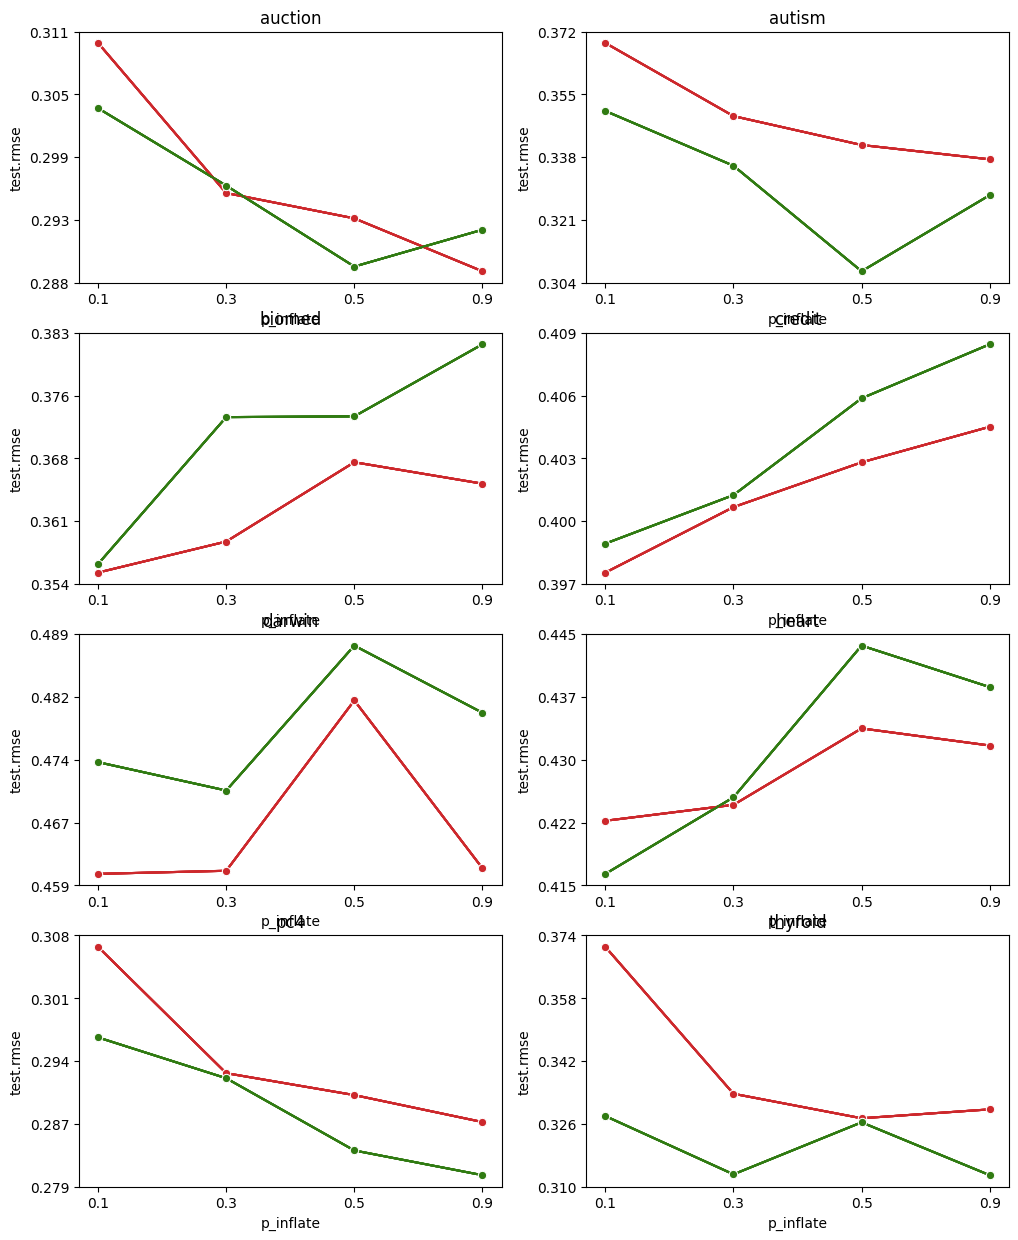

In [23]:
plot_by_p_inflate2(ana.results, 'test.rmse') #[ana.results['config.ms_upper'] == 5]

In [24]:
ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,0.309524,0.303545,0.295928,0.296674,0.295775,0.296455,0.298146,0.289592,0.293453,0.289036,...,0.286976,0.290465,0.284714,0.280396,0.278627,0.288376,0.279663,0.273980,0.279750,2.953698e-01
autism,0.369135,0.350639,0.330682,0.338213,0.349251,0.335749,0.292048,0.256315,0.341391,0.307048,...,0.030079,0.011332,0.122639,0.010643,0.002202,0.000251,0.084704,0.001259,0.000035,1.048136e-07
biomed,0.355042,0.356046,0.344969,0.364250,0.358654,0.373137,0.362122,0.353560,0.367886,0.373225,...,0.314405,0.306111,0.314906,0.324464,0.324757,0.318087,0.323105,0.330701,0.333569,3.417688e-01
credit,0.397580,0.398982,0.398502,0.398467,0.400749,0.401331,0.404540,0.405719,0.402917,0.406018,...,0.403330,0.400746,0.401095,0.407466,0.406278,0.405540,0.405300,0.409622,0.410699,4.100531e-01
darwin,0.460320,0.473838,0.464452,0.489790,0.460695,0.470407,0.478001,0.517376,0.481309,0.487945,...,0.380193,0.416068,0.347013,0.359277,0.368397,0.436497,0.327393,0.366392,0.390210,4.244978e-01
heart,0.422364,0.415905,0.415529,0.411476,0.424302,0.425220,0.399194,0.391185,0.433601,0.443677,...,0.381074,0.385683,0.372534,0.393374,0.399481,0.420317,0.380618,0.416357,0.429815,4.315052e-01
pc4,0.306855,0.296490,0.291786,0.304425,0.292398,0.291817,0.286586,0.295936,0.289888,0.283546,...,0.277858,0.282175,0.276058,0.282900,0.276306,0.277641,0.277119,0.289246,0.284284,2.888072e-01
thyroid,0.371320,0.327773,0.315840,0.290628,0.333516,0.312777,0.320426,0.319974,0.327211,0.326161,...,0.194820,0.236215,0.198973,0.199085,0.197279,0.235379,0.198626,0.195104,0.196198,2.475296e-01
wilt,0.114112,0.105195,0.100859,0.112922,0.098464,0.086056,0.086812,0.095251,0.089609,0.080433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
import pandas as pd
import re

def reshape_df(df):
    # Drop or reset index so 'dataset_name' is a column
    df = df.reset_index()

    # Extract all relevant columns
    config_cols = df.columns.difference(['dataset_name'])

    # Build MultiIndex from column names
    new_cols = []
    for col in config_cols:
        match = re.match(r'(.+)_inflate([\d.]+)_ms([\d.]+)_', col)
        if match:
            name, p_inflate, ms_upper = match.groups()
            new_cols.append((name, float(p_inflate), float(ms_upper)))
        else:
            raise ValueError(f"Column format unexpected: {col}")

    # Reassign MultiIndex to the config columns
    df_configs = df[config_cols]
    df_configs.columns = pd.MultiIndex.from_tuples(new_cols, names=["name", "p_inflate", "ms_upper"])

    # Add the dataset_name back as an index or column
    df_configs.insert(0, 'dataset_name', df['dataset_name'])

    # Set index if needed
    df_configs.set_index('dataset_name', inplace=True)

    return df_configs

reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack())

name         SLIM*SIG1                                                    \
p_inflate          0.1                                     0.3             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.309524  0.303545  0.295928  0.296674  0.295775  0.296455   
autism        0.369135  0.350639  0.330682  0.338213  0.349251  0.335749   
biomed        0.355042  0.356046  0.344969  0.364250  0.358654  0.373137   
credit        0.397580  0.398982  0.398502  0.398467  0.400749  0.401331   
darwin        0.460320  0.473838  0.464452  0.489790  0.460695  0.470407   
heart         0.422364  0.415905  0.415529  0.411476  0.424302  0.425220   
pc4           0.306855  0.296490  0.291786  0.304425  0.292398  0.291817   
thyroid       0.371320  0.327773  0.315840  0.290628  0.333516  0.312777   
wilt          0.114112  0.105195  0.100859  0.112922  0.098464  0.086056   

name                                                  ... SLIM+SIG1            \
p_inflate                              0.5            ...       0.3             
ms_upper           1.0       5.0       0.1       0.5  ...       1.0       5.0   
dataset_name                                          ...                       
auction       0.298146  0.289592  0.293453  0.289036  ...  0.286976  0.290465   
autism        0.292048  0.256315  0.341391  0.307048  ...  0.030079  0.011332   
biomed        0.362122  0.353560  0.367886  0.373225  ...  0.314405  0.306111   
credit        0.404540  0.405719  0.402917  0.406018  ...  0.403330  0.400746   
darwin        0.478001  0.517376  0.481309  0.487945  ...  0.380193  0.416068   
heart         0.399194  0.391185  0.433601  0.443677  ...  0.381074  0.385683   
pc4           0.286586  0.295936  0.289888  0.283546  ...  0.277858  0.282175   
thyroid       0.320426  0.319974  0.327211  0.326161  ...  0.194820  0.236215   
wilt          0.086812  0.095251  0.089609  0.080433  ...       NaN       NaN   

name                                                                      \
p_inflate          0.5                                     0.9             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.284714  0.280396  0.278627  0.288376  0.279663  0.273980   
autism        0.122639  0.010643  0.002202  0.000251  0.084704  0.001259   
biomed        0.314906  0.324464  0.324757  0.318087  0.323105  0.330701   
credit        0.401095  0.407466  0.406278  0.405540  0.405300  0.409622   
darwin        0.347013  0.359277  0.368397  0.436497  0.327393  0.366392   
heart         0.372534  0.393374  0.399481  0.420317  0.380618  0.416357   
pc4           0.276058  0.282900  0.276306  0.277641  0.277119  0.289246   
thyroid       0.198973  0.199085  0.197279  0.235379  0.198626  0.195104   
wilt               NaN       NaN       NaN       NaN       NaN       NaN   

name                                  
p_inflate                             
ms_upper           1.0           5.0  
dataset_name                          
auction       0.279750  2.953698e-01  
autism        0.000035  1.048136e-07  
biomed        0.333569  3.417688e-01  
credit        0.410699  4.100531e-01  
darwin        0.390210  4.244978e-01  
heart         0.429815  4.315052e-01  
pc4           0.284284  2.888072e-01  
thyroid       0.196198  2.475296e-01  
wilt               NaN           NaN  

[9 rows x 32 columns]

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_by_p_inflate_with_ms(df_reshaped, metric_name='metric', colors_dict=None):
    # Convert wide MultiIndex df to long-form
    df_long = df_reshaped.stack(level=[0, 1, 2]).reset_index()
    df_long.columns = ['dataset_name', 'name', 'p_inflate', 'ms_upper', metric_name]

    # Sort values to ensure lines connect properly
    df_long = df_long.sort_values(by=['dataset_name', 'name', 'ms_upper', 'p_inflate'])

    # Get unique datasets for subplots
    unique_datasets = df_long['dataset_name'].unique()
    fig, ax = plt.subplots(int(len(unique_datasets) / 2) + len(unique_datasets) % 2, 2,
                           figsize=(12, 15), squeeze=False)

    i = j = 0
    for dataset in unique_datasets:
        data_subset = df_long[df_long['dataset_name'] == dataset]

        sns.lineplot(
            data=data_subset,
            x='p_inflate',
            y=metric_name,
            hue='ms_upper',
            style='name',
            markers=True,
            dashes=True,
            palette = 'Set1',
            #palette=colors_dict,
            ax=ax[i, j]
        )

        ax[i, j].set_title(f'{dataset}')
        ax[i, j].set_xlabel('p_inflate')
        ax[i, j].set_ylabel(metric_name)
        ax[i, j].yaxis.set_major_locator(ticker.LinearLocator(5))
        if metric_name == 'nodes_count':
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
        else:
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.3f}"))

        j = (j + 1) % 2
        i = i + 1 if j == 0 else i

    fig.tight_layout()
    plt.show()


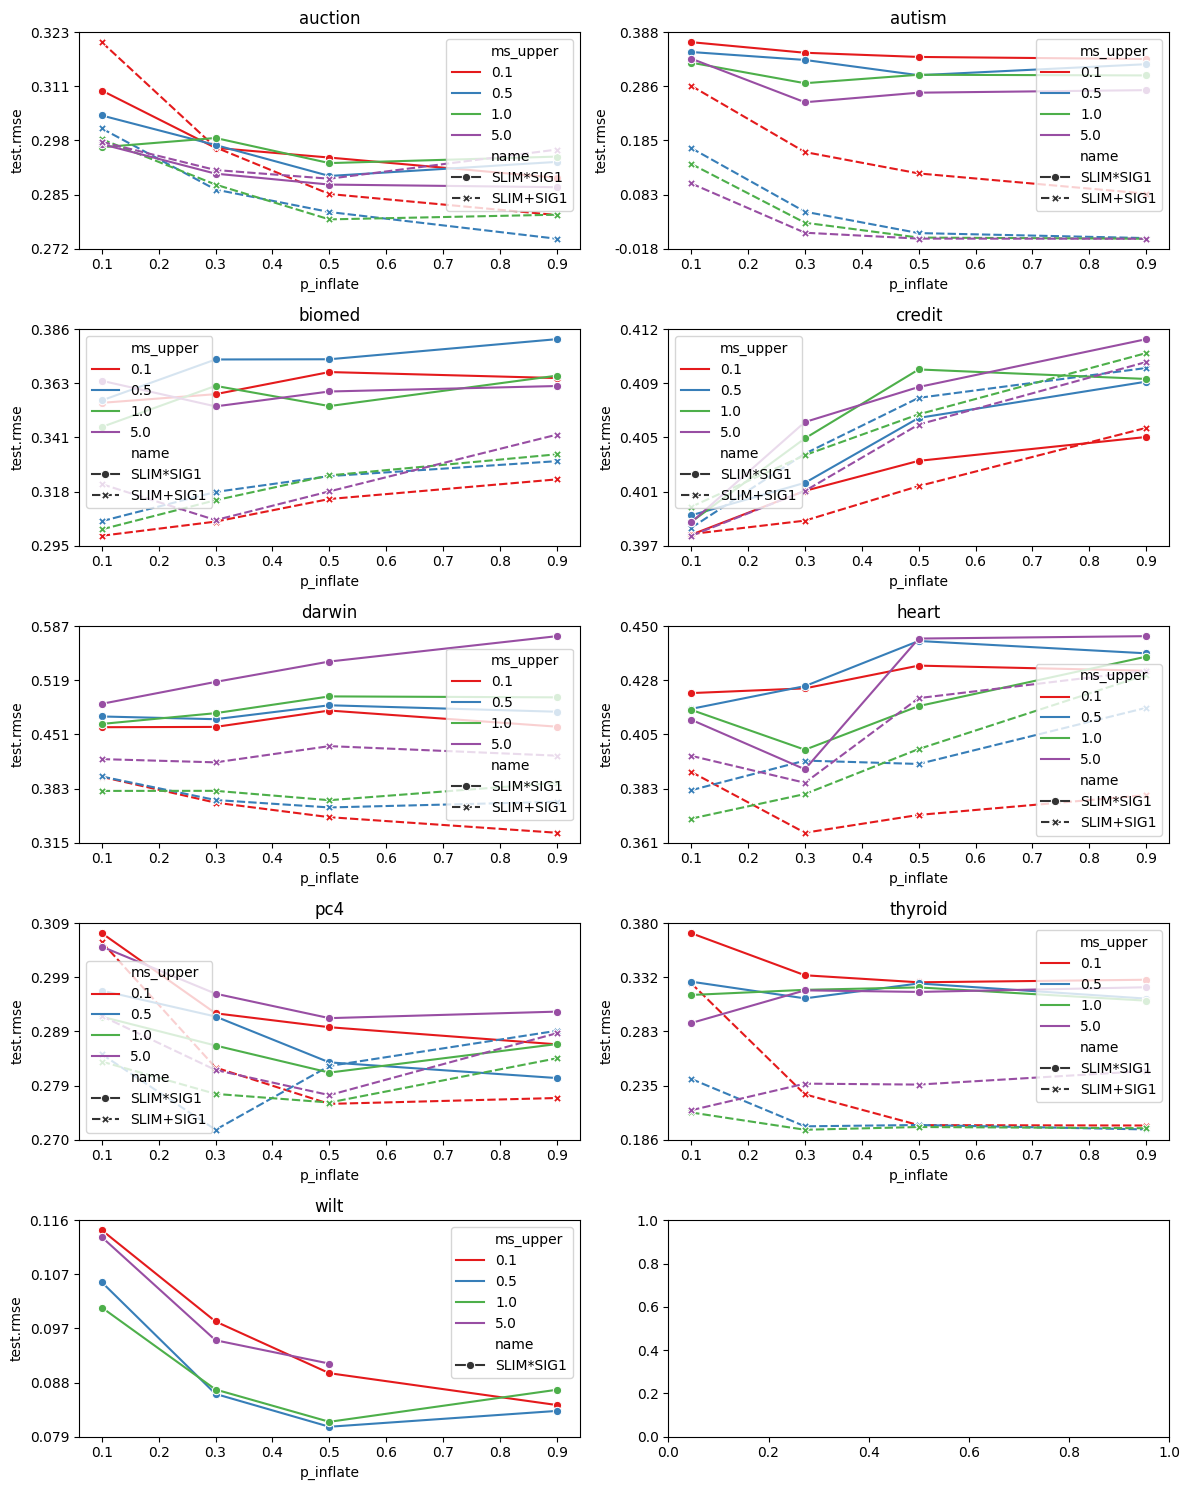

In [46]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'test.rmse', colors_dict)

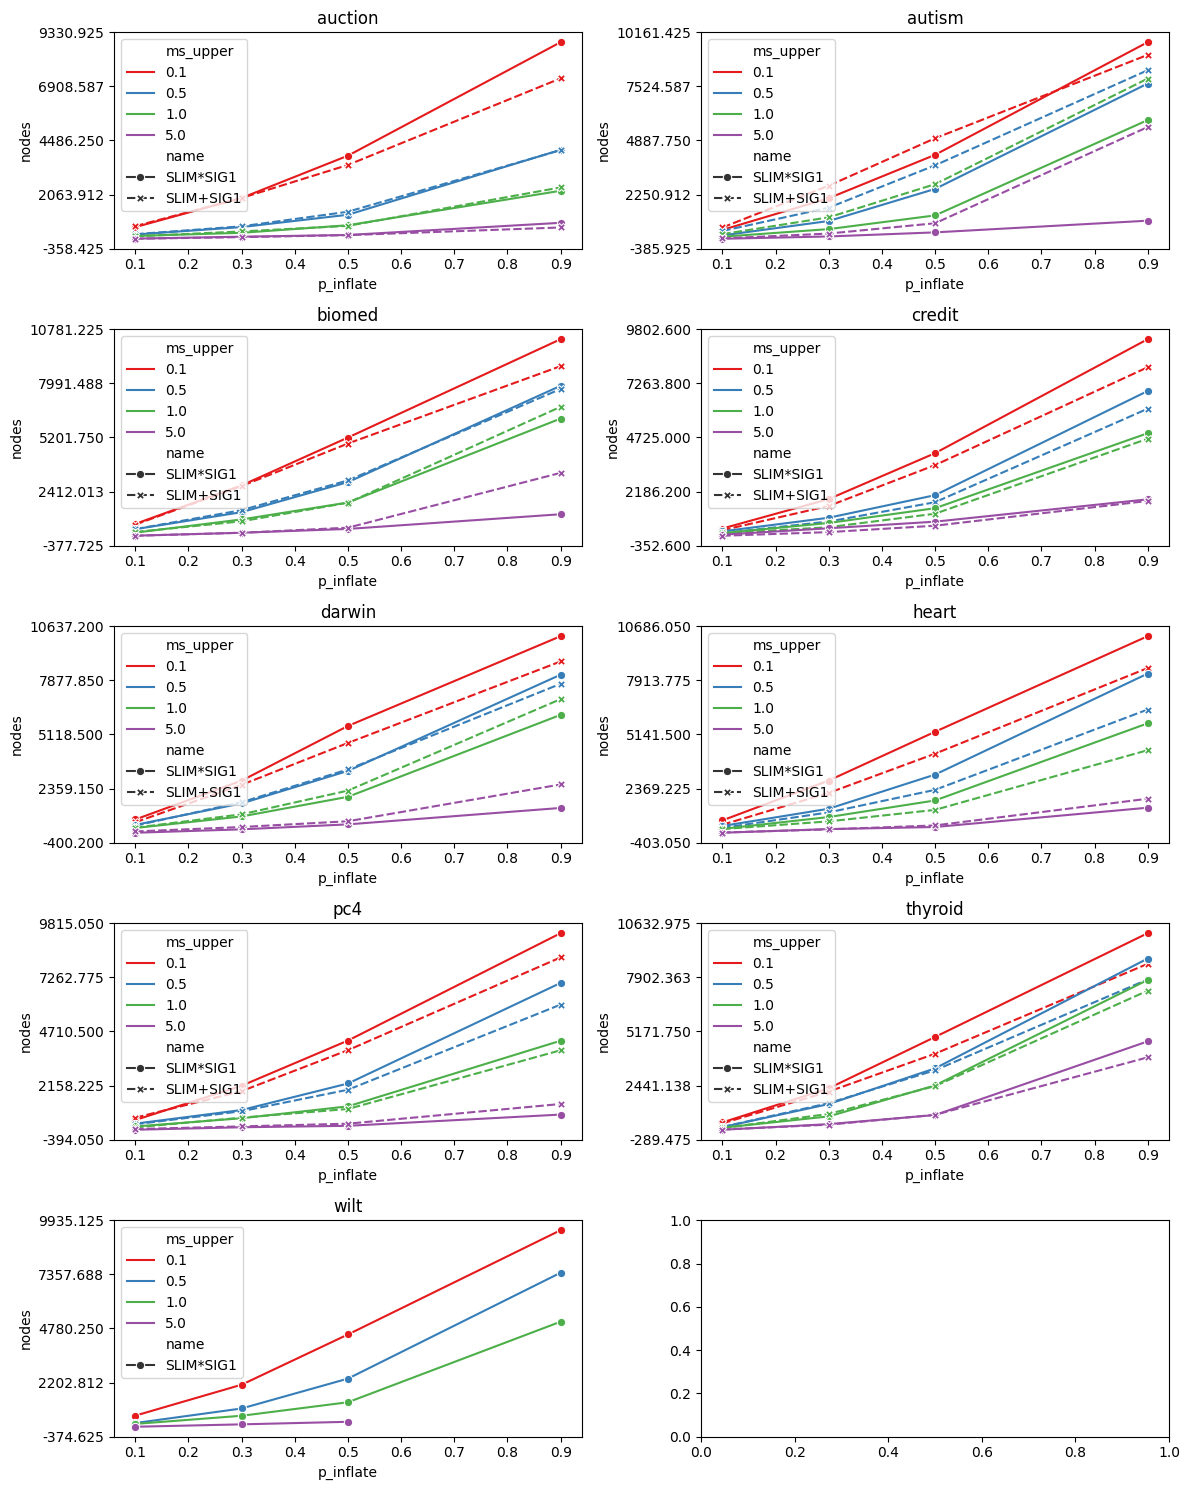

In [47]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['nodes_count'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'nodes', colors_dict)

C:\Users\leond\AppData\Local\Temp\ipykernel_35120\4142672195.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\leond\AppData\Local\Temp\ipykernel_35120\4142672195.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)


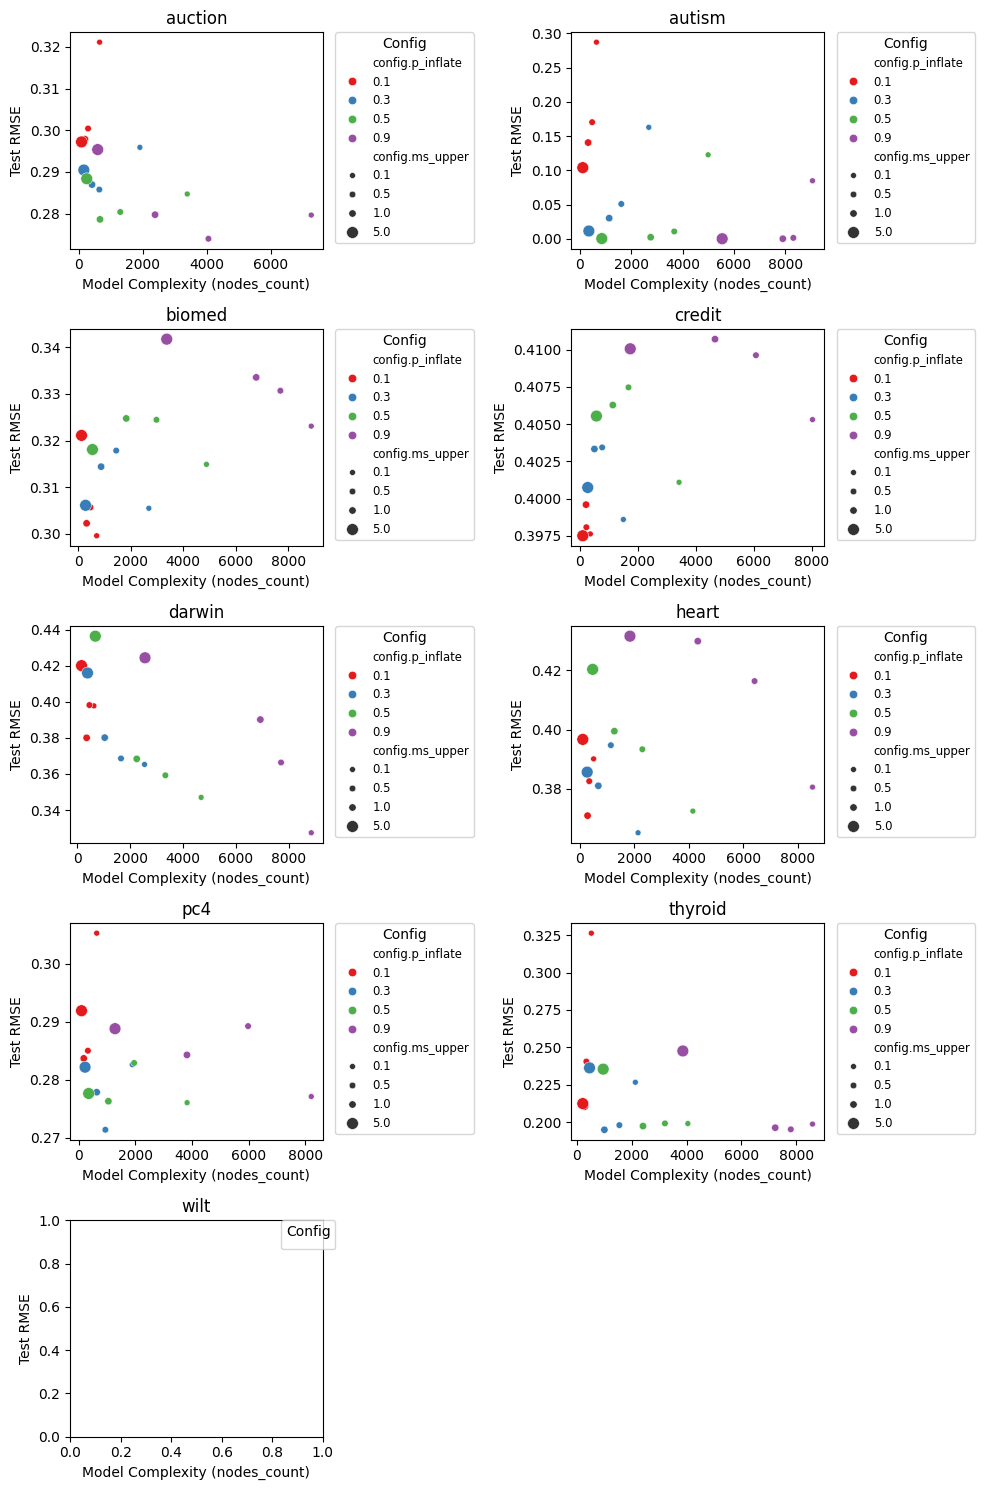

In [45]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM+SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    #ax.axvline(x=1000, color='black', linestyle='--')
    ax.set_title(f"{dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



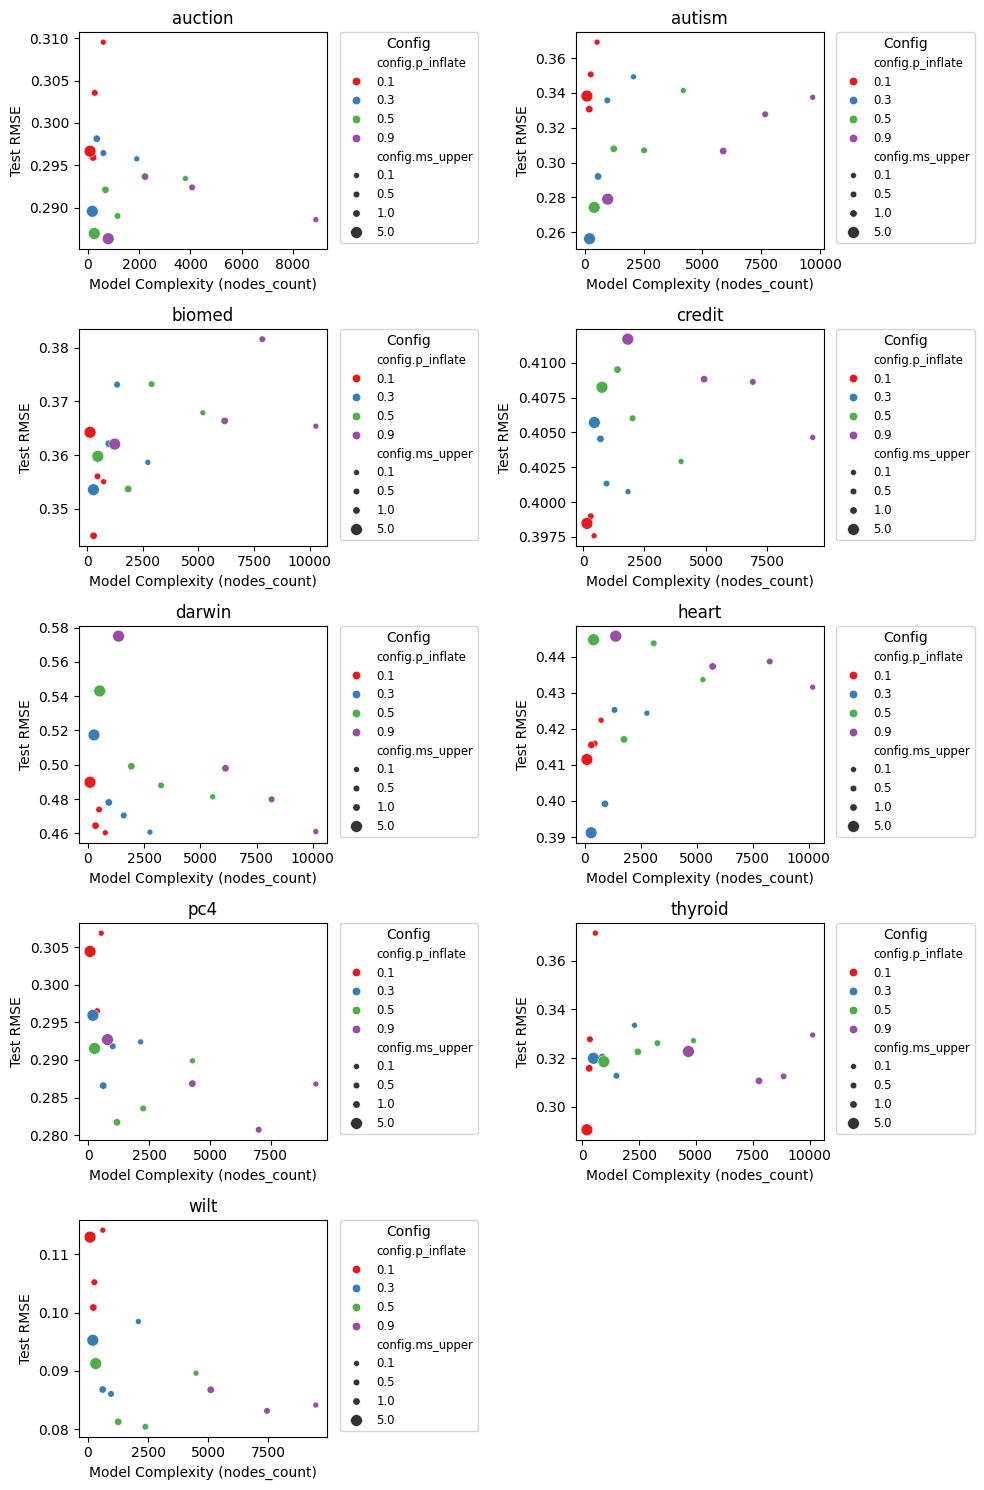

In [49]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM*SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    #ax.axvline(x=1000, color='black', linestyle='--')
    ax.set_title(f"{dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [42]:
import numpy as np
import pandas as pd

def pareto_optimal(df, cols_to_minimize):
    data = df[cols_to_minimize].values
    is_pareto = np.ones(data.shape[0], dtype=bool)
    
    for i, point in enumerate(data):
        if is_pareto[i]:
            # Remove points that are dominated by point[i]
            is_pareto[is_pareto] = np.any(data[is_pareto] < point, axis=1) | np.all(data[is_pareto] == point, axis=1)
            is_pareto[i] = True  # Keep current point
    
    return df[is_pareto].reset_index(drop=True)

# Example usage:
pareto_df = pareto_optimal(df[(df['dataset_name']=='credit') & (df['name']=='SLIM+SIG1')], ['test.rmse', 'nodes_count'])
print(pareto_df)


  dataset_name              config_settings       name  config.p_inflate  \
0       credit  SLIM+SIG1_inflate0.1_ms5.0_  SLIM+SIG1               0.1   

   config.ms_upper  nodes_count  test.rmse  
0              5.0        109.0   0.397508  


In [31]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])

y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.754056277000725


(array([-2.70610989e+02,  6.67703872e+00, -6.10934784e-12, -6.13238713e-12,
        -6.14553699e-12, -6.15961861e-12, -6.21899190e-12, -6.12651748e-12,
        -6.12293831e-12,  5.87432153e+01, -4.26180945e+01]),
 280.79139148452987)

In [ ]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.773092758426989

In [ ]:
lr.coef_, lr.intercept_

(array([3718.96964286, -221.1308149 ,  505.3       , -140.4375    ,
          43.41875   ,  -20.55625   ,  254.4375    ,  -34.0125    ,
         287.1625    ,   68.83125   ,  449.0375    , -130.08625   ]),
 -147.57111970210258)

Median Test Errors (RMSE) Table

In [30]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,603.0,271.5,206.5,87.5,1910.5,605.0,348.5,174.0,3805.0,1157.5,...,410.5,154.5,3389.5,1293.5,660.0,244.5,7269.0,4052.5,2383.0,587.5
autism,524.0,257.0,193.5,93.5,2071.0,959.0,563.5,205.0,4185.5,2523.0,...,1139.0,346.5,4994.0,3674.0,2755.0,850.0,9061.5,8313.5,7905.0,5542.0
biomed,740.5,468.5,290.0,133.0,2729.0,1348.0,971.0,284.5,5198.5,2898.0,...,876.0,284.0,4889.5,2984.5,1833.5,546.5,8882.0,7705.0,6784.5,3376.0
credit,448.0,315.0,232.0,159.0,1831.0,954.5,709.0,461.0,3986.5,2014.0,...,511.0,280.0,3426.0,1684.0,1143.0,580.0,8023.0,6074.5,4664.5,1744.5
darwin,778.5,503.5,344.0,101.5,2762.0,1599.5,933.5,276.0,5552.0,3258.0,...,1043.5,394.5,4685.5,3334.5,2253.5,689.0,8845.5,7704.5,6923.0,2566.5
heart,734.5,447.5,299.5,101.0,2777.5,1332.5,906.5,288.5,5279.0,3083.5,...,685.0,275.5,4155.5,2300.5,1273.5,476.5,8547.5,6421.0,4335.5,1846.0
pc4,529.0,358.0,224.0,70.0,2148.5,1002.0,613.5,188.0,4281.0,2254.0,...,640.5,228.5,3828.0,1959.0,1051.5,356.5,8207.5,5979.0,3823.0,1286.0
thyroid,576.5,338.0,308.0,207.0,2300.5,1503.5,881.0,491.0,4892.5,3307.0,...,1006.0,464.0,4047.5,3212.0,2412.0,961.0,8589.0,7798.5,7231.5,3864.5
wilt,624.0,270.5,230.0,94.0,2099.0,965.0,618.0,208.5,4494.0,2389.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


P-Values for the ANOVA Test comparing the performance of different Inflation Rates for each SLIM-Version

In [ ]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,4.641983e-11,4.853233e-11
autism,4.469186e-01,2.082317e-09
biomed,5.533432e-01,5.984792e-03
caesarian,8.530047e-01,8.740171e-01
credit,7.080252e-01,4.317246e-01
darwin,5.585435e-01,7.505635e-03
facebook,4.322860e-01,9.710876e-01
landmines,2.080152e-10,1.438810e-04
student,2.425804e-01,1.589840e-05


P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [ ]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.001754,0.018330
autism,0.838818,0.109952
biomed,0.493315,0.139655
caesarian,0.943190,0.722714
credit,0.910465,0.754382
darwin,0.137366,0.717290
facebook,0.636660,0.694887
landmines,0.031395,0.158601
student,0.507252,0.080934


Countplot for the Sum of best achieved Performance for the different Inflation Rates accross Datasets

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

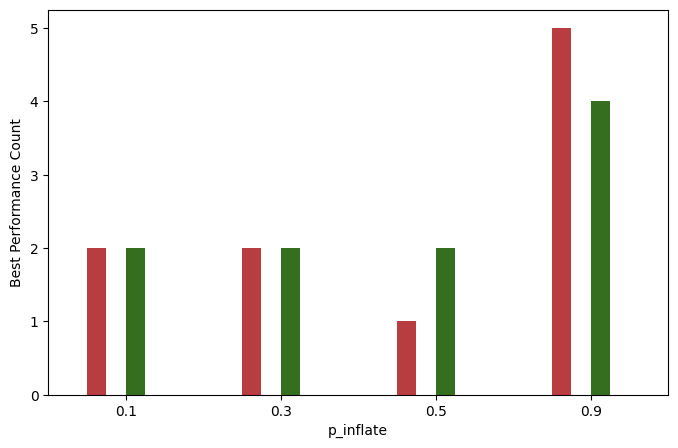

In [ ]:
plot_countplot(ana.results, 'test.rmse')

Visualization for the Median Tree Size of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

             SLIM*SIG1                                                     \
dataset_name   auction  autism  biomed caesarian  credit  darwin facebook   
0.1              328.0   289.0   237.0     267.0   332.0   733.0    211.0   
0.1              109.0   197.0    94.0     109.0   174.0   276.0    133.0   
0.1               93.0   197.0    94.0     122.0   122.0   211.0     63.0   
0.1               80.0    93.0    55.0      81.0   150.0    81.0     68.0   
0.3              890.0  1060.0   783.0     717.0  1008.0  1573.0    798.0   
0.3              432.0   873.0   362.0     592.0   605.0   640.0    345.0   
0.3              275.0   713.0   278.0     399.0   434.0   445.0    289.0   
0.3              107.0   319.0   122.0     133.0   265.0   211.0    148.0   
0.5             1540.0  2356.0  1592.0    2147.0  1855.0  2059.0   1802.0   
0.5              955.0  2061.0   836.0    1465.0  1051.0  1474.0    995.0   
0.5              537.0  1679.0   696.0     897.0   828.0   982.0    668.0   

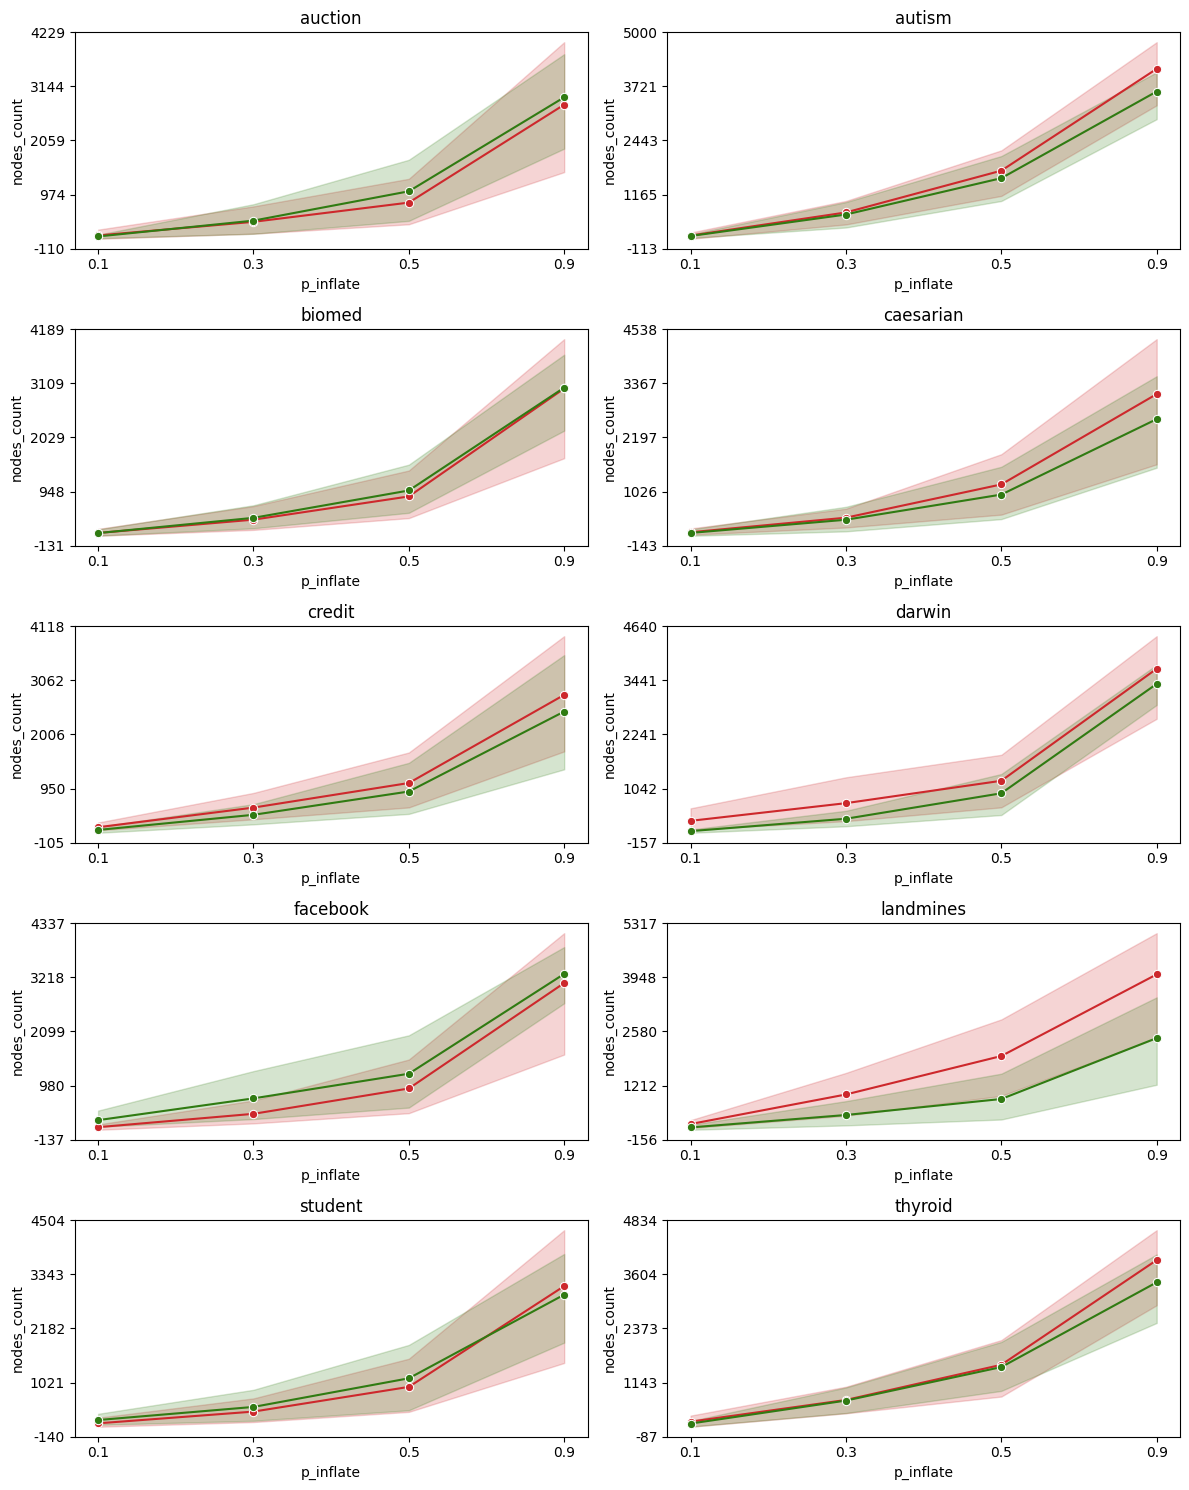

In [ ]:
plot_by_p_inflate(ana.results, 'nodes_count') #[ana.results['config.ms_upper']==5]

Median Tree Size Table

In [ ]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,328.0,109.0,93.0,80.0,890.0,432.0,275.0,107.0,1540.0,955.0,...,307.0,146.0,2007.0,1258.0,664.0,227.0,4139.0,3423.0,2748.0,1392.0
autism,289.0,197.0,197.0,93.0,1060.0,873.0,713.0,319.0,2356.0,2061.0,...,678.0,269.0,2197.0,1952.0,1360.0,699.0,4176.0,3905.0,3695.0,2628.0
biomed,237.0,94.0,94.0,55.0,783.0,362.0,278.0,122.0,1592.0,836.0,...,280.0,148.0,1723.0,1027.0,772.0,355.0,3865.0,3501.0,3008.0,1724.0
caesarian,267.0,109.0,122.0,81.0,717.0,592.0,399.0,133.0,2147.0,1465.0,...,290.0,91.0,1864.0,1120.0,658.0,201.0,3827.0,3211.0,2352.0,986.0
credit,332.0,174.0,122.0,150.0,1008.0,605.0,434.0,265.0,1855.0,1051.0,...,317.0,185.0,1744.0,915.0,575.0,335.0,4013.0,2773.0,2188.0,843.0
darwin,733.0,276.0,211.0,81.0,1573.0,640.0,445.0,211.0,2059.0,1474.0,...,349.0,157.0,1545.0,1049.0,819.0,333.0,3954.0,3532.0,3282.0,2686.0
facebook,211.0,133.0,63.0,68.0,798.0,345.0,289.0,148.0,1802.0,995.0,...,425.0,148.0,2386.0,1343.0,920.0,251.0,4070.0,3511.0,3175.0,2408.0
landmines,373.0,224.0,256.0,96.0,1783.0,1181.0,776.0,202.0,3268.0,2344.0,...,282.0,124.0,1816.0,903.0,598.0,168.0,3840.0,2871.0,2256.0,685.0
student,312.0,124.0,85.0,57.0,813.0,395.0,280.0,98.0,1874.0,1053.0,...,376.0,108.0,2247.0,1350.0,572.0,278.0,4115.0,3450.0,2713.0,1354.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [ ]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,5.979925e-18,1.082121e-22
autism,1.879692e-34,4.236451e-37
biomed,1.601541e-10,3.061488e-23
caesarian,2.959930e-17,4.916322e-19
credit,5.504761e-19,9.416238e-17
darwin,8.928884e-25,1.456714e-46
facebook,9.506388e-15,2.801172e-11
landmines,4.660608e-20,2.617964e-15
student,1.204075e-16,4.044322e-20


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [ ]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014679,0.002033
autism,0.000001,0.000002
biomed,0.015151,0.003000
caesarian,0.000848,0.002219
credit,0.000782,0.008717
darwin,0.019247,0.000001
facebook,0.006183,0.063294
landmines,0.001234,0.008877
student,0.001197,0.007792
